# Exercise: Linear regression using different cost functions

Previously, we have fit some simple models using what is called Ordinary Least-Squares (OLS) Linear Regression. OLS refers to the way that the best model is chosen, which ultimately is dictated by its cost function.

Cost functions can be changed though, depending on the user's needs. 

In this exercise, we will have a deeper look at how cost functions can change:

1. how well models appear to have fit data
2. the kinds of relationships a model represents

## Loading the data

Let's start by having a look at the data. To make this exercise simpler, we will only use a few datapoints this time.

In [1]:
import pandas
from datetime import datetime

# Load a file containing our weather data
dataset = pandas.read_csv('Data/seattleWeather_1948-2017.csv', parse_dates=['date'])

# Convert the dates into numbers so we can use it in our models
# We make a year column which can contain fractions. For example
# 1948.5 is half way through the year 1948
dataset["year"] = [(d.year + d.timetuple().tm_yday / 365.25) for d in dataset.date]


# For the sake of this exercise, let's look at Feb 1st for the following years:
desired_dates = [
    datetime(1950,2,1),
    datetime(1960,2,1),
    datetime(1970,2,1),
    datetime(1980,2,1),
    datetime(1990,2,1),
    datetime(2000,2,1),
    datetime(2010,2,1),
    datetime(2017,2,1),
]

dataset = dataset[dataset.date.isin(desired_dates)].copy()

# Print the dataset
dataset


,date,amount_of_precipitation,max_temperature,min_temperature,rain,year
762,1950-02-01,0.00,27,1,False,1950.087611
4414,1960-02-01,0.15,52,44,True,1960.087611
8067,1970-02-01,0.00,50,42,False,1970.087611
11719,1980-02-01,0.37,54,36,True,1980.087611
15372,1990-02-01,0.08,45,37,True,1990.087611
19024,2000-02-01,1.34,49,41,True,2000.087611
22677,2010-02-01,0.08,49,40,True,2010.087611
25234,2017-02-01,0.00,43,29,False,2017.087611


## First method: Ordinary Least Squares Regression

The first method we'll look at is called _Ordinary Least Squares (OLS) Regression_. This is the most common method for linear regressions. 

It works by minimizing the residual sum of squares between the actual and predicted labels of the dataset. In other words, it calculates the difference between each predicted value with the expected value, squares that difference, and sums or averages the result. It aims to make this final value as small as possible.

As this method works with squared differences, points that are outliers (deviate from the normal trend) will influence the fitting procedure much more than those that are more 'typical'. 

OLS is built into many machine learning packages. Here, we will use a custom implementation which provides more flexibility, so we can contrast the result with other cost functions later.

Read the code carefully below to understand the fitting and assessment procedure.

MSE Ordinary Least Squares: 147.49019906534954
MAD, Ordinary Least Squares: 9.25061456833484


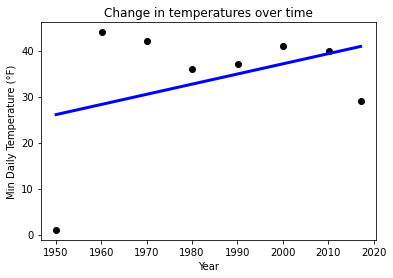

In [2]:
%run microsoft_custom_linear_regressor
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as graph

# Create and fit the model
# We use a custom object that we have hidden from this notebook as
# you do not need to understand its details. This accepts:
# 1) our features (X)
# 2) our labels (y)
# 3) a cost function to try to minimise. Here we will use 
#    mean_squared_error (from sklearn) as our cost function
X = dataset.year
y = dataset.min_temperature

model_ols = MicrosoftCustomLinearRegressor().fit(X, y, mean_squared_error)

# Make predictions on the training data
y_ols_pred = model_ols.predict(X)

# Calculate how far those predictions were from the expected
# results. For this, use mean squared error, which is the 
# same as our cost function
mse_ols = mean_squared_error(y, y_ols_pred)
print(f"MSE Ordinary Least Squares: {mse_ols}")

# We also calculate the mean absolute difference for reference
# later in this exercise 
mad_ols = mean_absolute_error(y, y_ols_pred)
print(f"MAD, Ordinary Least Squares: {mad_ols}")


# Graph the model
def graph_linear_regression(slope, intercept):
    '''
    Shows a graph of the data with the model's
    trend line superimposed
    '''
    %matplotlib inline
    line = slope * X + intercept
    graph.scatter(X, y,  color='black')
    graph.plot(X, line, '-', c = 'blue', linewidth = 3)
    graph.ylabel('Min Daily Temperature (°F)')
    graph.xlabel("Year")
    graph.title('Change in temperatures over time')
    graph.show()


graph_linear_regression(model_ols.slope, model_ols.intercept) 


Our OLS method normally does well, but here it did a poor job - the line is a far distance from the values for many years. Why? Notice the datapoint at the bottom left doesn't seem to follow the trend of the other datapoints. 1950 was a very cold winter in Seattle, and this datapoint is strongly influencing our final model (the blue line). What happens if we change the cost function?

## Second method: Mean Absolute Deviation

The second cost function we will look at is called _Mean Absolute Deviation_ (MAD). 

This is similar to OLS, except that instead of calculating the squared difference between predictions and expected values, it calculates the absolute difference. This means that outlier points have less effect on the regression than they do in OLS.

Let's repeat what we've just done, but using MAD.

MSE error for MAD model: 196.77019826098672
MAD error for MAD model: 7.992568442937199


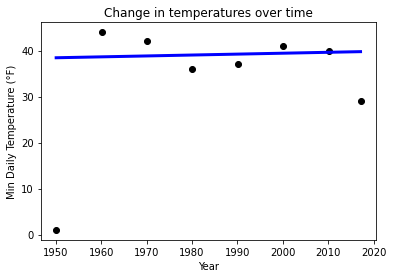

In [4]:
from sklearn.base import BaseEstimator
from scipy.optimize import minimize
import numpy as np

# Create and fit the model, using MAD
# skikit provides use with a MAD function, called mean_absolute_error
model_mad = MicrosoftCustomLinearRegressor().fit(X, y, mean_absolute_error)

# Make predictions, and calculate the error term
y_mad_pred = model_mad.predict(X)

# Calculate the error, using mean squared error
mse = mean_squared_error(y, y_mad_pred)
print(f"MSE error for MAD model: {mse}")

# Calculate the error, using MAD
mad = mean_absolute_error(y, y_mad_pred)
print(f"MAD error for MAD model: {mad}")

# Graph the result
graph_linear_regression(model_mad.slope, model_mad.intercept) 

It's clear that this line passes through the majority of points much better than OLS did, at the expense of almost ignoring the measurement taken in 1950. 

In our farming scenario, we're interested in how average temperatures are changing over time. We don't have much interest in 1950 specifically, so for us this is a better result. In other situations, of course, we might consider this result worse.

Looking at costs calculated, notice how:
* MSE is better for OLS regression.
* MAD is better for the MAD regression. 

We can expect these differences, because OLS aims to minimise MSE, ignoring MAD. The MAD option aims for the opposite.

## Summary

In this exercise, you learned about how changing the cost function used during fitting can result in different final results. 

We also learned how this behaviour is because these cost functions describe the 'best' way to fit a model, although from a data analyst's point of view there can be drawbacks no matter which cost function is chosen.